In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
!wget https://raw.githubusercontent.com/spyderroque/IBM_Advance_Data_Science/main/Capstone/weather/Climate_day_train_feature.parquet

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [3]:
df = pd.read_parquet('Climate_day_train_feature.parquet')
df.head()

Date  Wind_avg  Precepitation  sunshine_hours  snow_height  \
0  1991-01-01       4.5            7.1             3.7            0   
1  1991-01-02       9.2            3.8             0.0            0   
2  1991-01-03       5.3            9.2             0.0            0   
3  1991-01-04       6.2            0.4             4.1            0   
4  1991-01-05       7.7            2.9             1.1            0   

   Coverage_avg  Vapour_p_avg  Air_p_avg  Temp_avg  Rel_Humid_avg  Rain  Snow  \
0           4.7           7.0     1010.8       4.8           82.0     1     0   
1           7.3          10.7      996.7      11.4           81.0     1     0   
2           7.3           9.6     1001.9       8.6           85.0     1     0   
3           6.3           7.9     1003.5       6.8           79.0     1     0   
4           5.3           7.1     1000.4       6.6           74.0     1     0   

   RainAndSnow  
0            0  
1            0  
2            0  
3            0  
4            0

Following code has been inserted here as a result of an iteration in the Model Definition phase. All graphs with normalised data, are originally done during the Model Definition phase.

In [4]:
scaled_data = MinMaxScaler().fit_transform(np.array(df['Wind_avg']).reshape(-1,1))
temp1 =np.array(df.iloc[:,1:12])
scaled_data_array = MinMaxScaler().fit_transform(temp1)
column_headers = list(df.iloc[:,1:12].columns)
df_norm = pd.DataFrame(scaled_data_array, columns = column_headers)
df_norm['Date'] = df['Date']
df_norm = df_norm.reindex(columns = list(df.columns))
list(df.columns)
df_norm['RainAndSnow'] = df['RainAndSnow']
df_norm['Rain'] = df['Rain']
df_norm['Snow'] = df['Snow']

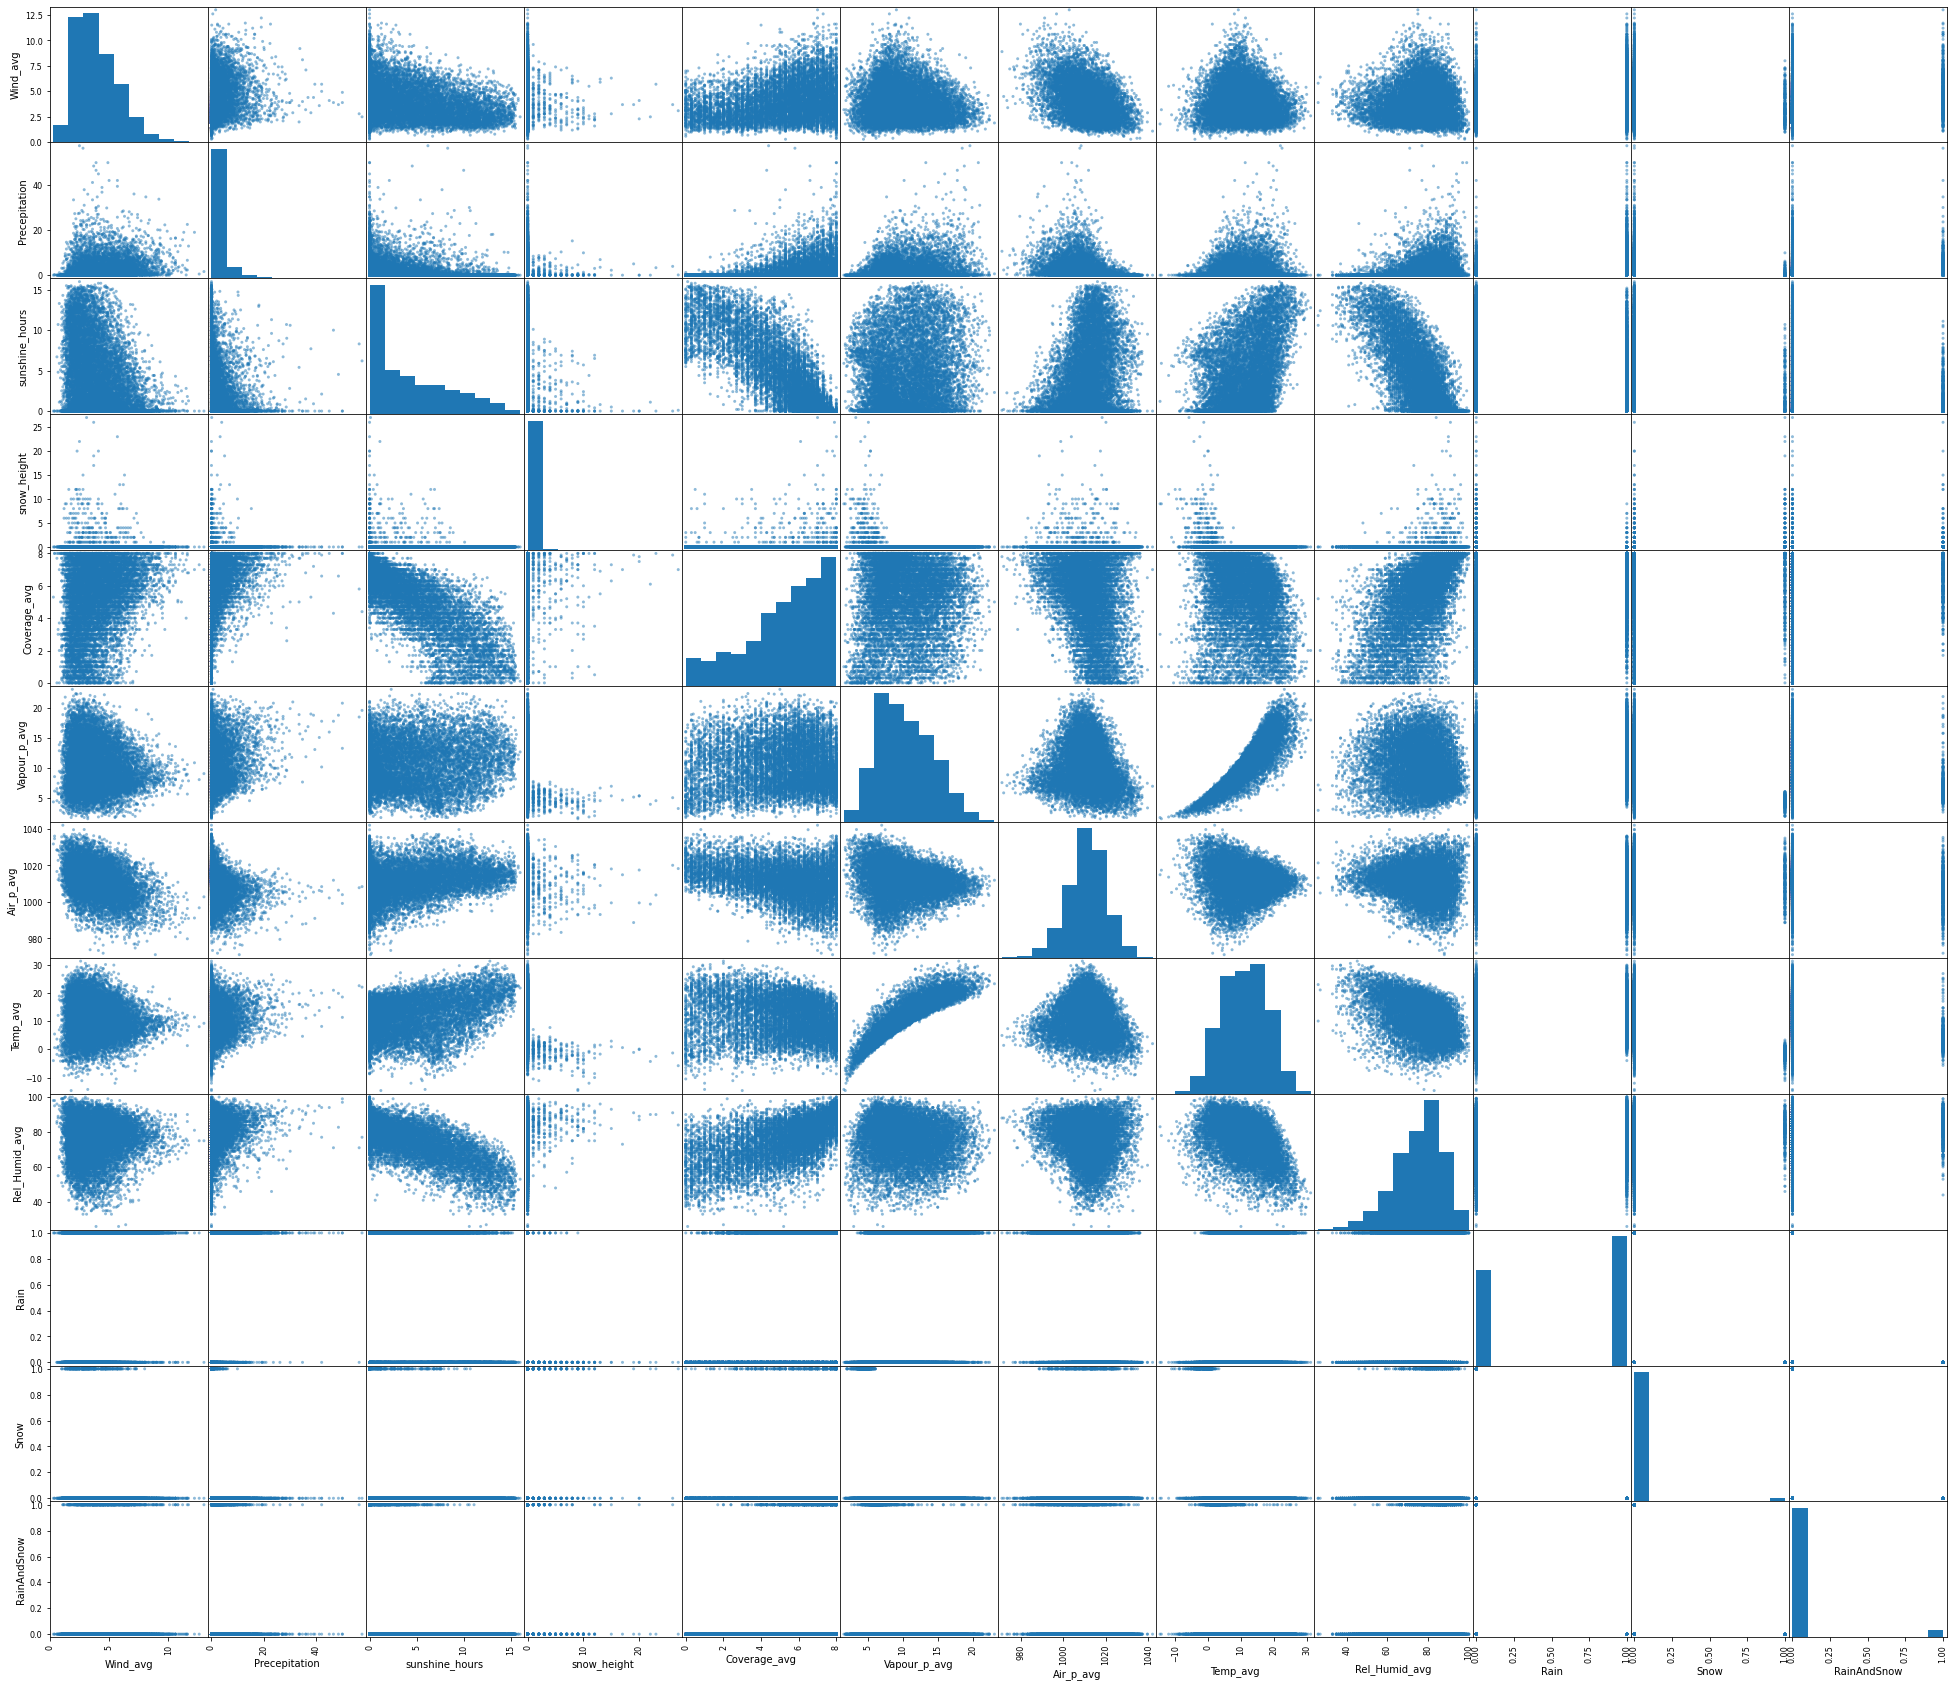

In [5]:
pd.plotting.scatter_matrix(df, figsize = (34,30))
plt.show()

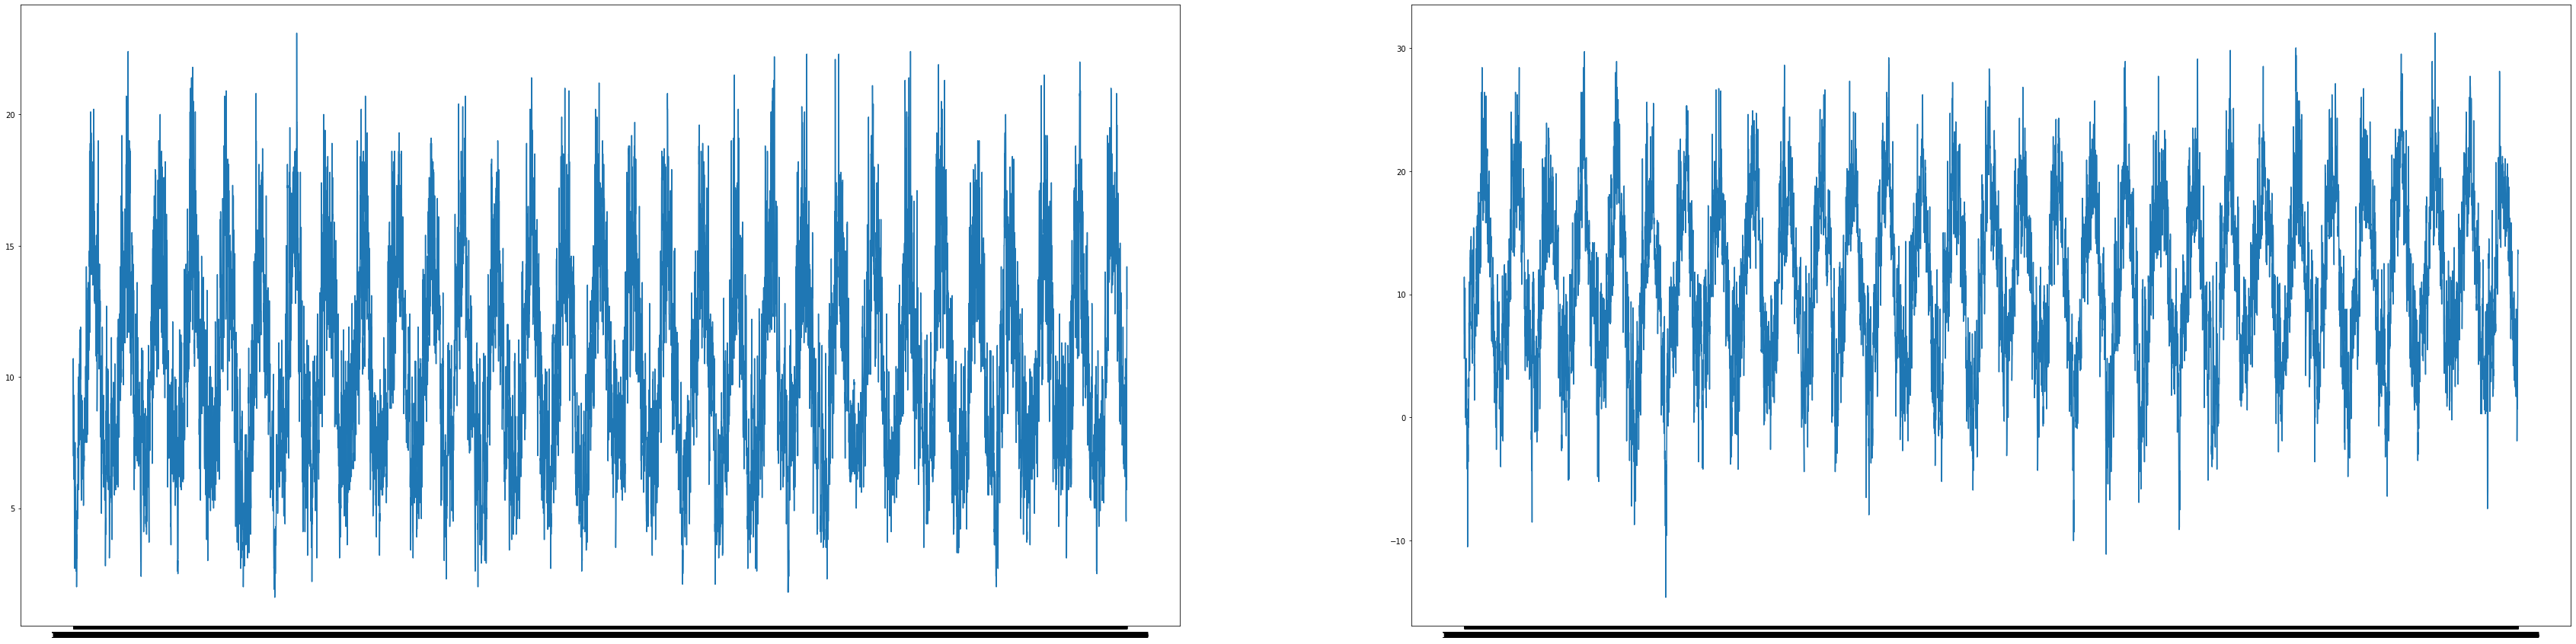

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(60,15))
ax1.plot(df['Date'],df['Vapour_p_avg'])
ax2.plot(df['Date'],df['Temp_avg'])
plt.show()

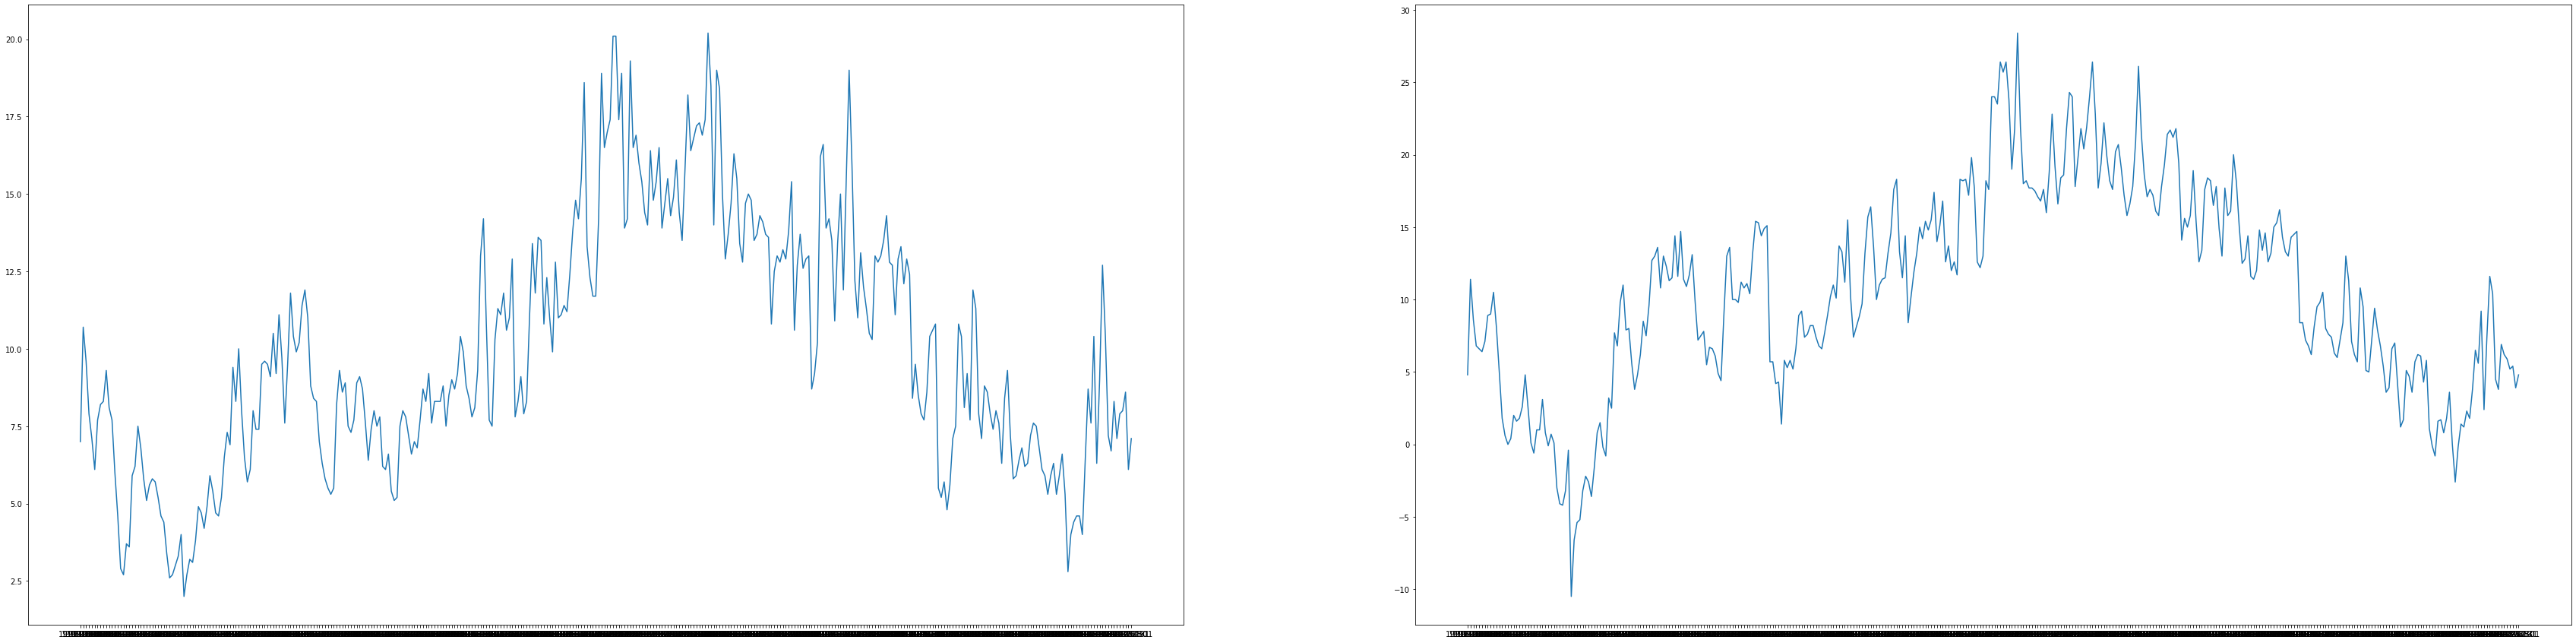

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(60,15))
ax1.plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Vapour_p_avg'])
ax2.plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Temp_avg'])
plt.show()

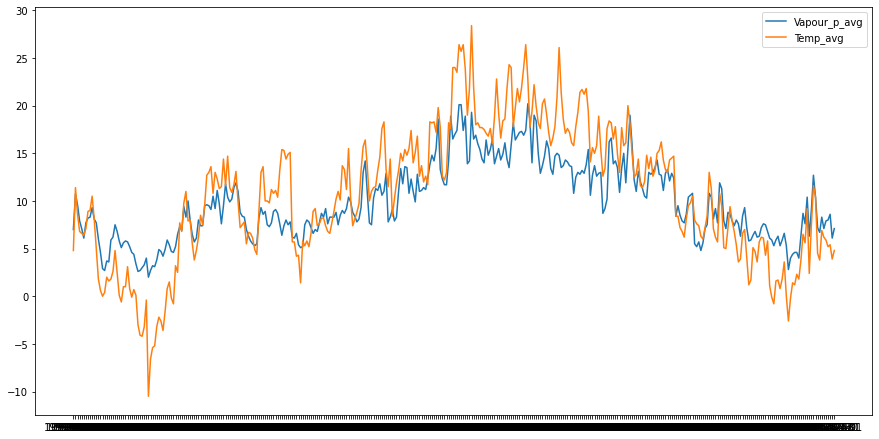

In [8]:
#fig, ax = plt.subplot(1,1)
fig = plt.figure(figsize=(15,7.5))
plt.plot (df.loc[0:365, 'Date'],df.loc[0:365, 'Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot( df.loc[0:365, 'Date'],df.loc[0:365, 'Temp_avg'], label = 'Temp_avg')
plt.legend()
plt.show()

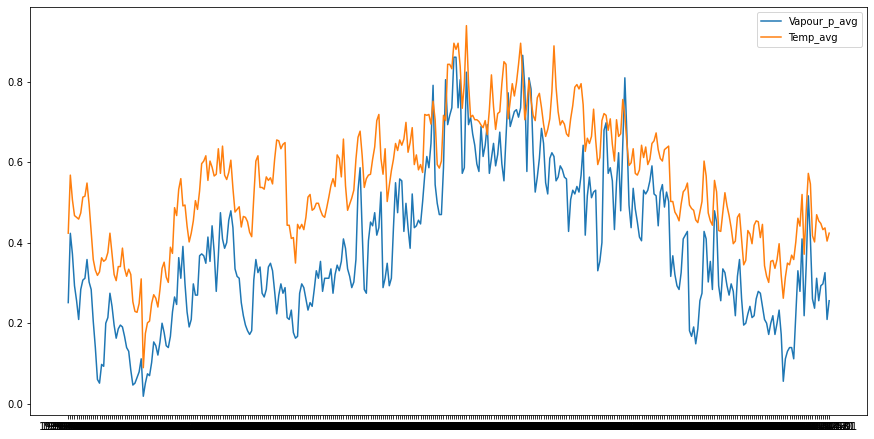

In [9]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot( df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Temp_avg'], label = 'Temp_avg')
plt.legend()
plt.show()

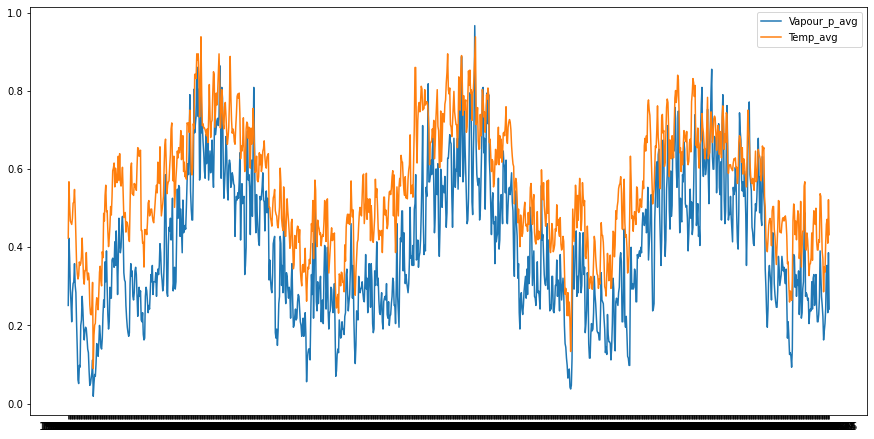

In [10]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df_norm.loc[0:1095, 'Date'],df_norm.loc[0:1095, 'Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot( df_norm.loc[0:1095, 'Date'],df_norm.loc[0:1095, 'Temp_avg'], label = 'Temp_avg')
plt.legend()
plt.show()

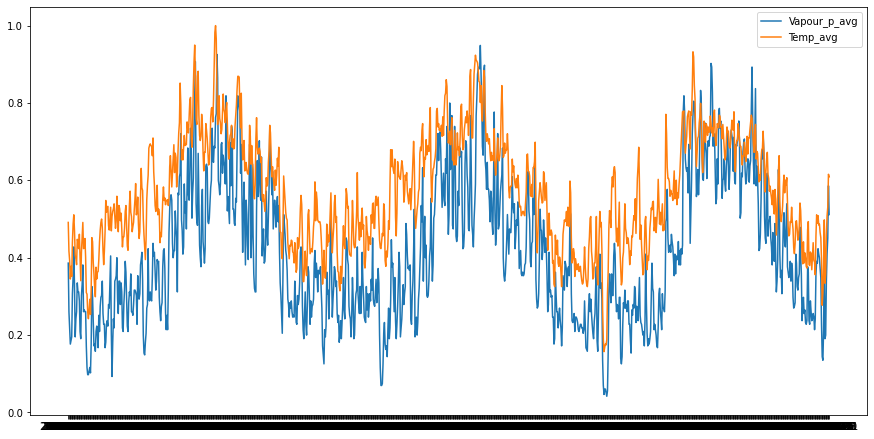

In [49]:
fig = plt.figure(figsize=(15,7.5))
temp2 = df.shape[0]
temp3 = df.shape[0]-1096
plt.plot (df_norm.loc[temp3:temp2, 'Date'],df_norm.loc[temp3:temp2, 'Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot( df_norm.loc[temp3:temp2, 'Date'],df_norm.loc[temp3:temp2, 'Temp_avg'], label = 'Temp_avg')
plt.legend()
plt.show()

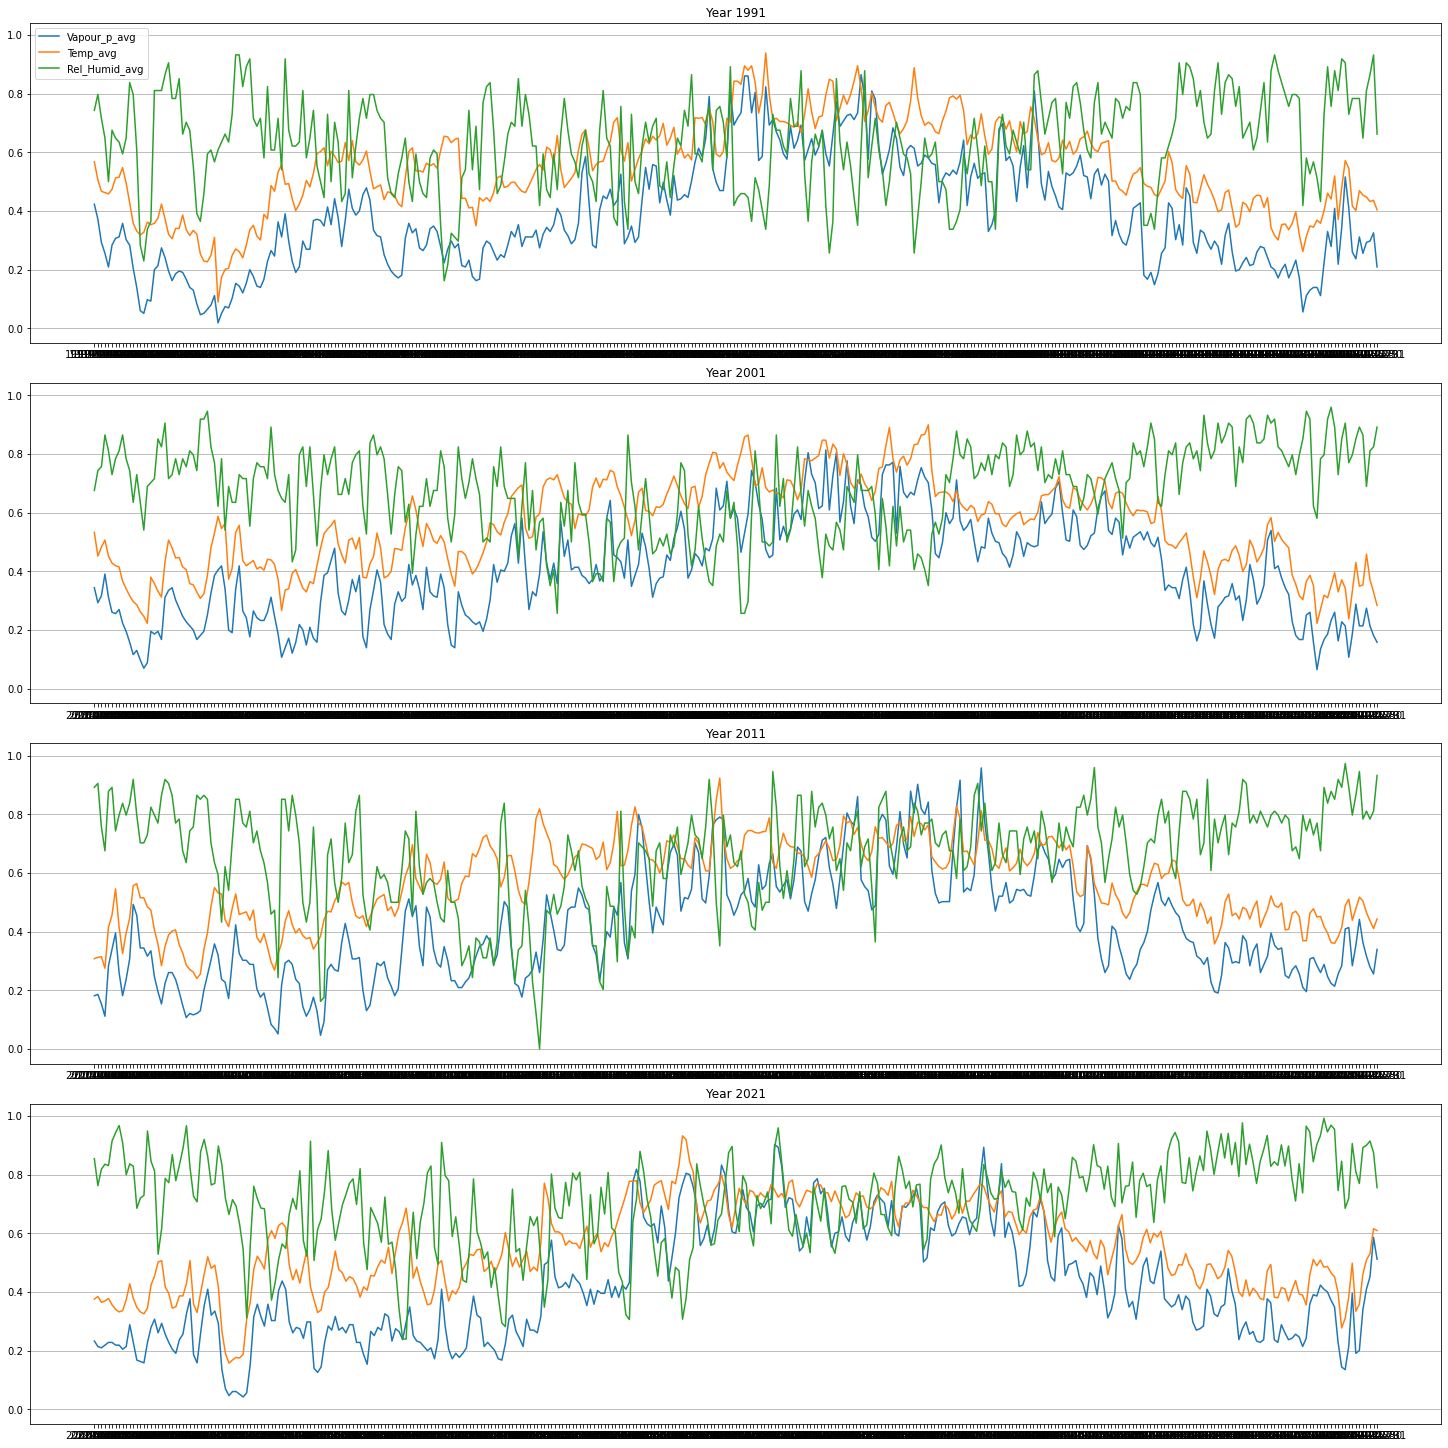

In [58]:
mask91 = (df_norm['Date']>'1991-01-01') & (df_norm['Date'] <= '1991-12-31')
mask01 = (df_norm['Date']>'2001-01-01') & (df_norm['Date'] <= '2001-12-31')
mask11 = (df_norm['Date']>'2011-01-01') & (df_norm['Date'] <= '2011-12-31')
mask21 = (df_norm['Date']>'2021-01-01') & (df_norm['Date'] <= '2021-12-31')
fig, axs = plt.subplots(4, figsize=(20,20), constrained_layout=True, sharey=True)
axs[0].plot (df_norm.loc[mask91, 'Date'],df_norm.loc[mask91, 'Vapour_p_avg'], label = 'Vapour_p_avg')
axs[0].plot( df_norm.loc[mask91, 'Date'],df_norm.loc[mask91, 'Temp_avg'], label = 'Temp_avg')
axs[0].plot( df_norm.loc[mask91, 'Date'],df_norm.loc[mask91, 'Rel_Humid_avg'], label = 'Rel_Humid_avg')
axs[1].plot (df_norm.loc[mask01, 'Date'],df_norm.loc[mask01, 'Vapour_p_avg'], label = 'Vapour_p_avg')
axs[1].plot( df_norm.loc[mask01, 'Date'],df_norm.loc[mask01, 'Temp_avg'], label = 'Temp_avg')
axs[1].plot( df_norm.loc[mask01, 'Date'],df_norm.loc[mask01, 'Rel_Humid_avg'], label = 'Rel_Humid_avg')
axs[2].plot (df_norm.loc[mask11, 'Date'],df_norm.loc[mask11, 'Vapour_p_avg'], label = 'Vapour_p_avg')
axs[2].plot( df_norm.loc[mask11, 'Date'],df_norm.loc[mask11, 'Temp_avg'], label = 'Temp_avg')
axs[2].plot( df_norm.loc[mask11, 'Date'],df_norm.loc[mask11, 'Rel_Humid_avg'], label = 'Rel_Humid_avg')
axs[3].plot (df_norm.loc[mask21, 'Date'],df_norm.loc[mask21, 'Vapour_p_avg'], label = 'Vapour_p_avg')
axs[3].plot( df_norm.loc[mask21, 'Date'],df_norm.loc[mask21, 'Temp_avg'], label = 'Temp_avg')
axs[3].plot( df_norm.loc[mask21, 'Date'],df_norm.loc[mask21, 'Rel_Humid_avg'], label = 'Rel_Humid_avg')

axs[0].grid(axis = 'y')
axs[1].grid(axis = 'y')
axs[2].grid(axis = 'y')
axs[3].grid(axis = 'y')

axs[0].set_title('Year 1991')
axs[1].set_title('Year 2001')
axs[2].set_title('Year 2011')
axs[3].set_title('Year 2021')
axs[0].legend()
plt.show()

In [ ]:
# The normalized average temperature and vapour pressure seem to be related quite some bit. That said, there seems to be an evolution to higher concentration of vapour pressure in th air

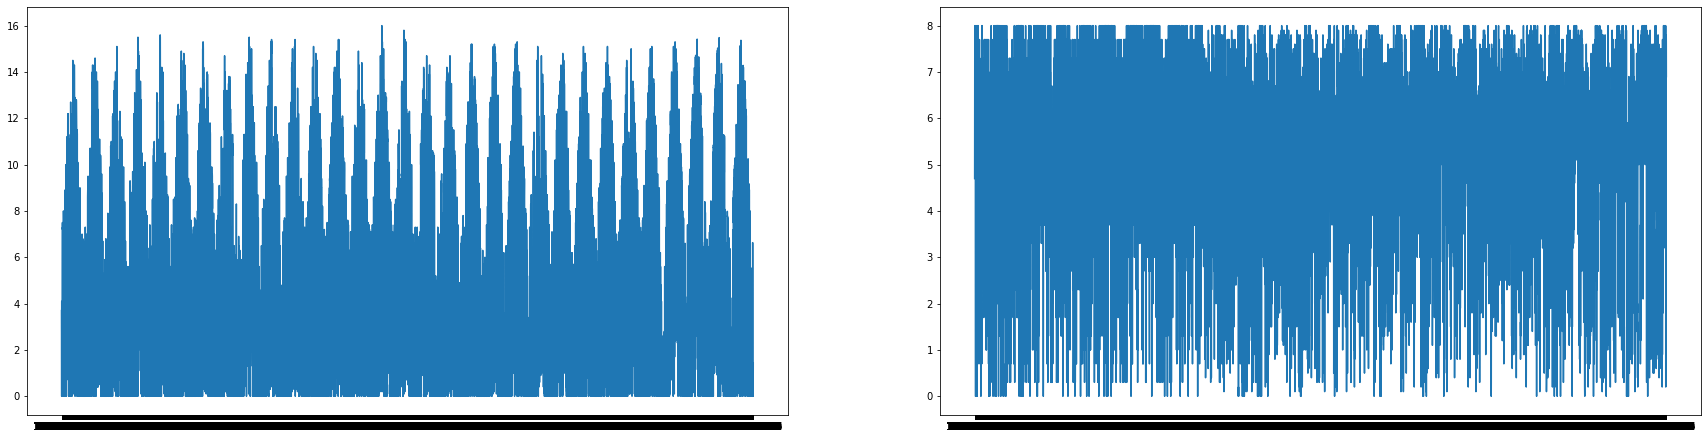

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,7.5))
ax1.plot(df['Date'],df['sunshine_hours'])
ax2.plot(df['Date'],df['Coverage_avg'])
plt.show()


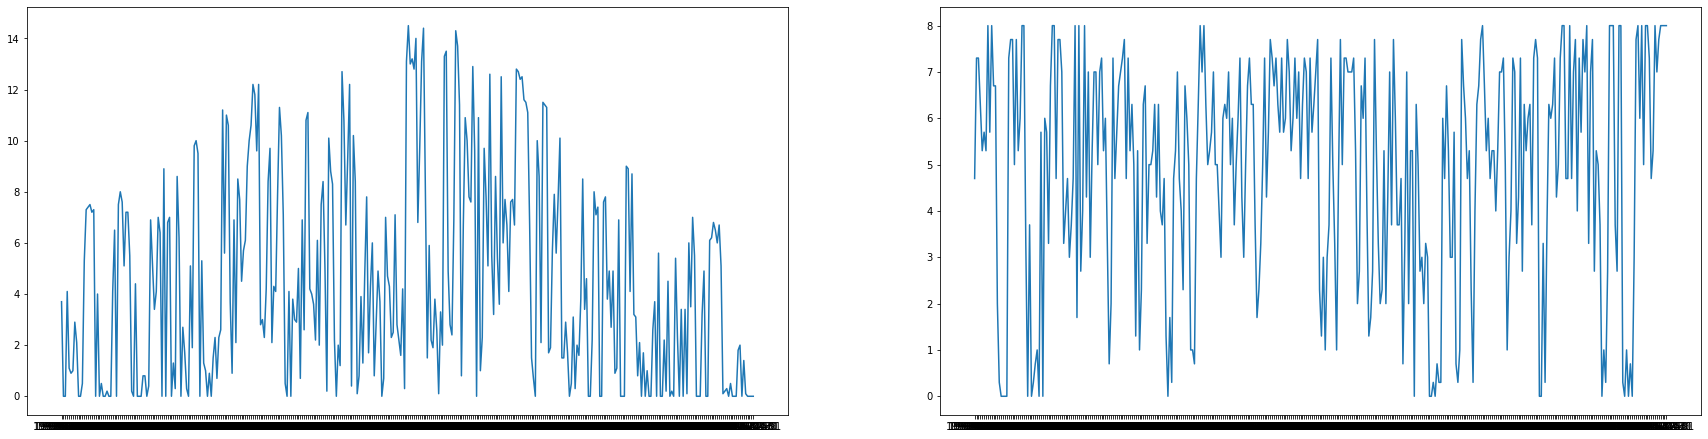

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,7.5))
ax1.plot(df.loc[0:365, 'Date'],df.loc[0:365, 'sunshine_hours'])
ax2.plot(df.loc[0:365,'Date'],df.loc[0:365, 'Coverage_avg'])
plt.show()

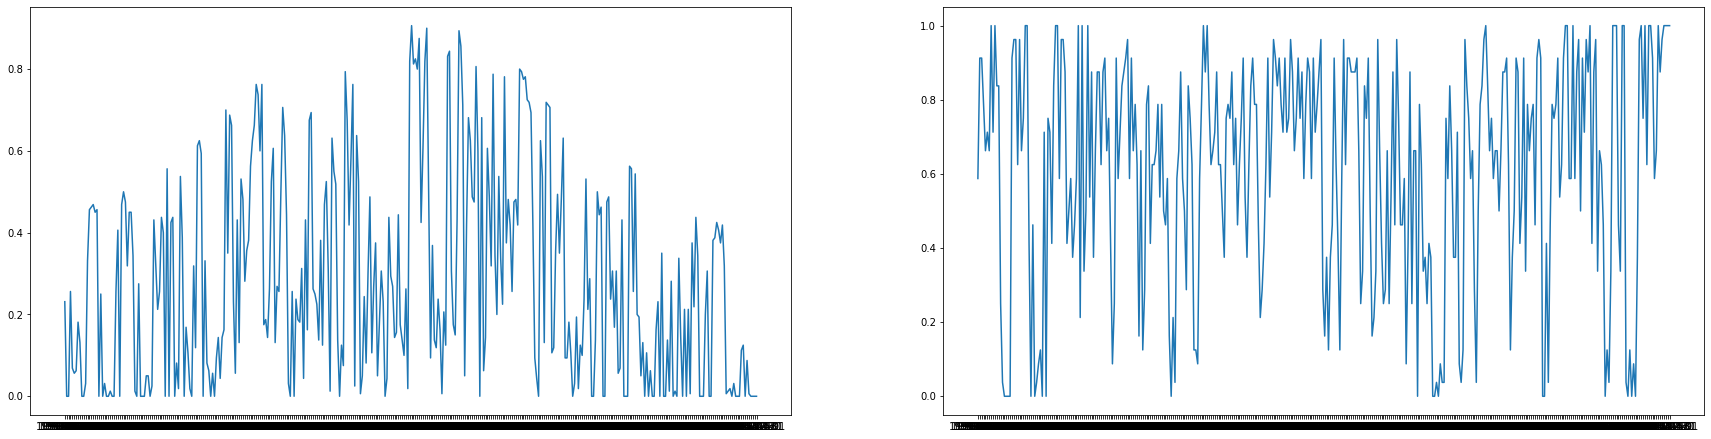

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,7.5))
ax1.plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'sunshine_hours'])
ax2.plot(df_norm.loc[0:365,'Date'],df_norm.loc[0:365, 'Coverage_avg'])
plt.show()

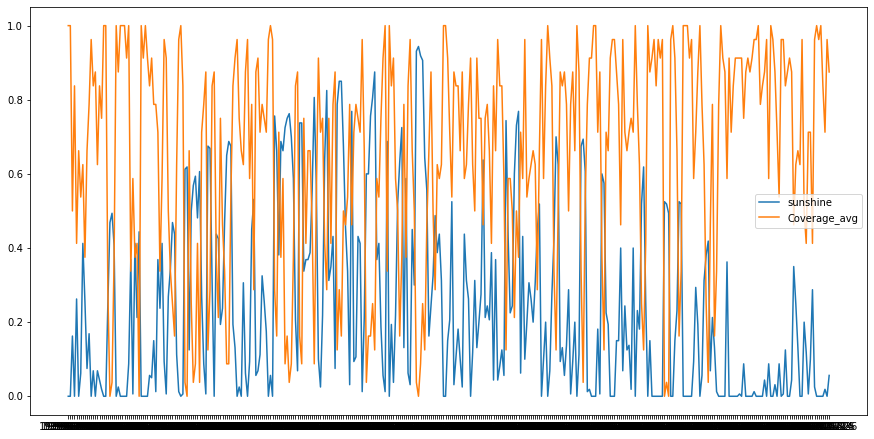

In [44]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df_norm.loc[730:1095, 'Date'],df_norm.loc[730:1095, 'sunshine_hours'], label = 'sunshine')
plt.plot( df_norm.loc[730:1095, 'Date'],df_norm.loc[730:1095, 'Coverage_avg'], label = 'Coverage_avg')
plt.legend()
plt.show()

In [20]:
# OK, that was not useful. what about plotting the inverse of Coverage_avg?

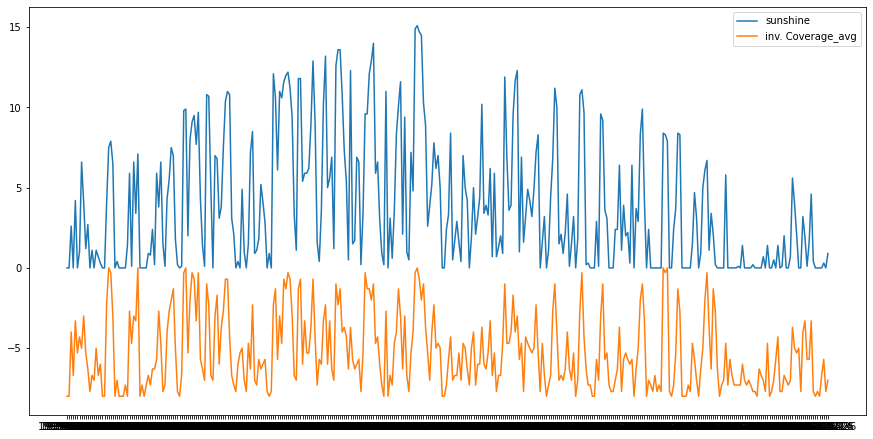

In [45]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df.loc[730:1095, 'Date'],df.loc[730:1095, 'sunshine_hours'], label = 'sunshine')
plt.plot( df.loc[730:1095, 'Date'],-df.loc[730:1095, 'Coverage_avg'], label = 'inv. Coverage_avg')
plt.legend()
plt.show()

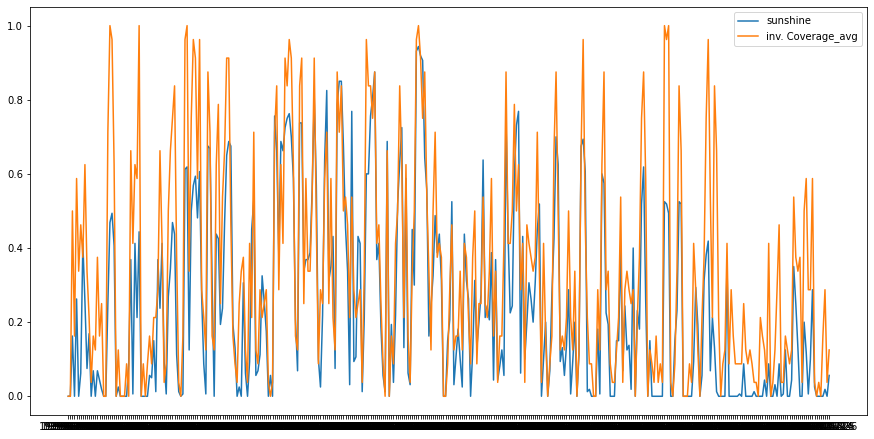

In [46]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df_norm.loc[730:1095, 'Date'],df_norm.loc[730:1095, 'sunshine_hours'], label = 'sunshine')
plt.plot( df_norm.loc[730:1095, 'Date'],1-df_norm.loc[730:1095, 'Coverage_avg'], label = 'inv. Coverage_avg')
plt.legend()
plt.show()

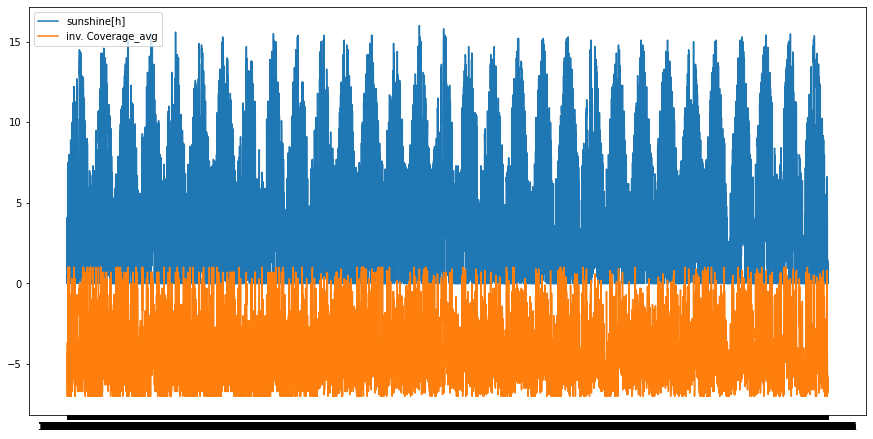

In [47]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df.loc[:, 'Date'],df.loc[:, 'sunshine_hours'], label = 'sunshine[h]')
plt.plot( df.loc[:, 'Date'],1-df.loc[:, 'Coverage_avg'], label = 'inv. Coverage_avg')
plt.legend()
plt.show()

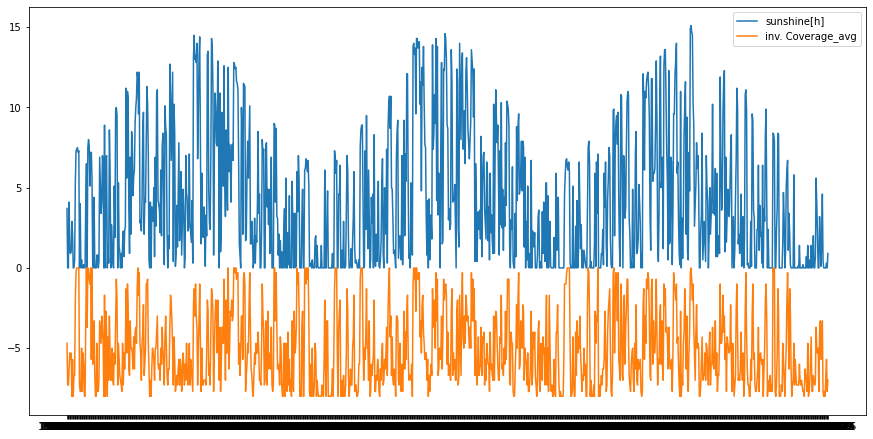

In [48]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df.loc[0:1095, 'Date'],df.loc[0:1095, 'sunshine_hours'], label = 'sunshine[h]')
plt.plot( df.loc[0:1095, 'Date'],-df.loc[0:1095, 'Coverage_avg'], label = 'inv. Coverage_avg')
plt.legend()
plt.show()

In [34]:
#looks like that vapour pressure is correlated to the inverse of the coverage and the angle of the earth to the sun!

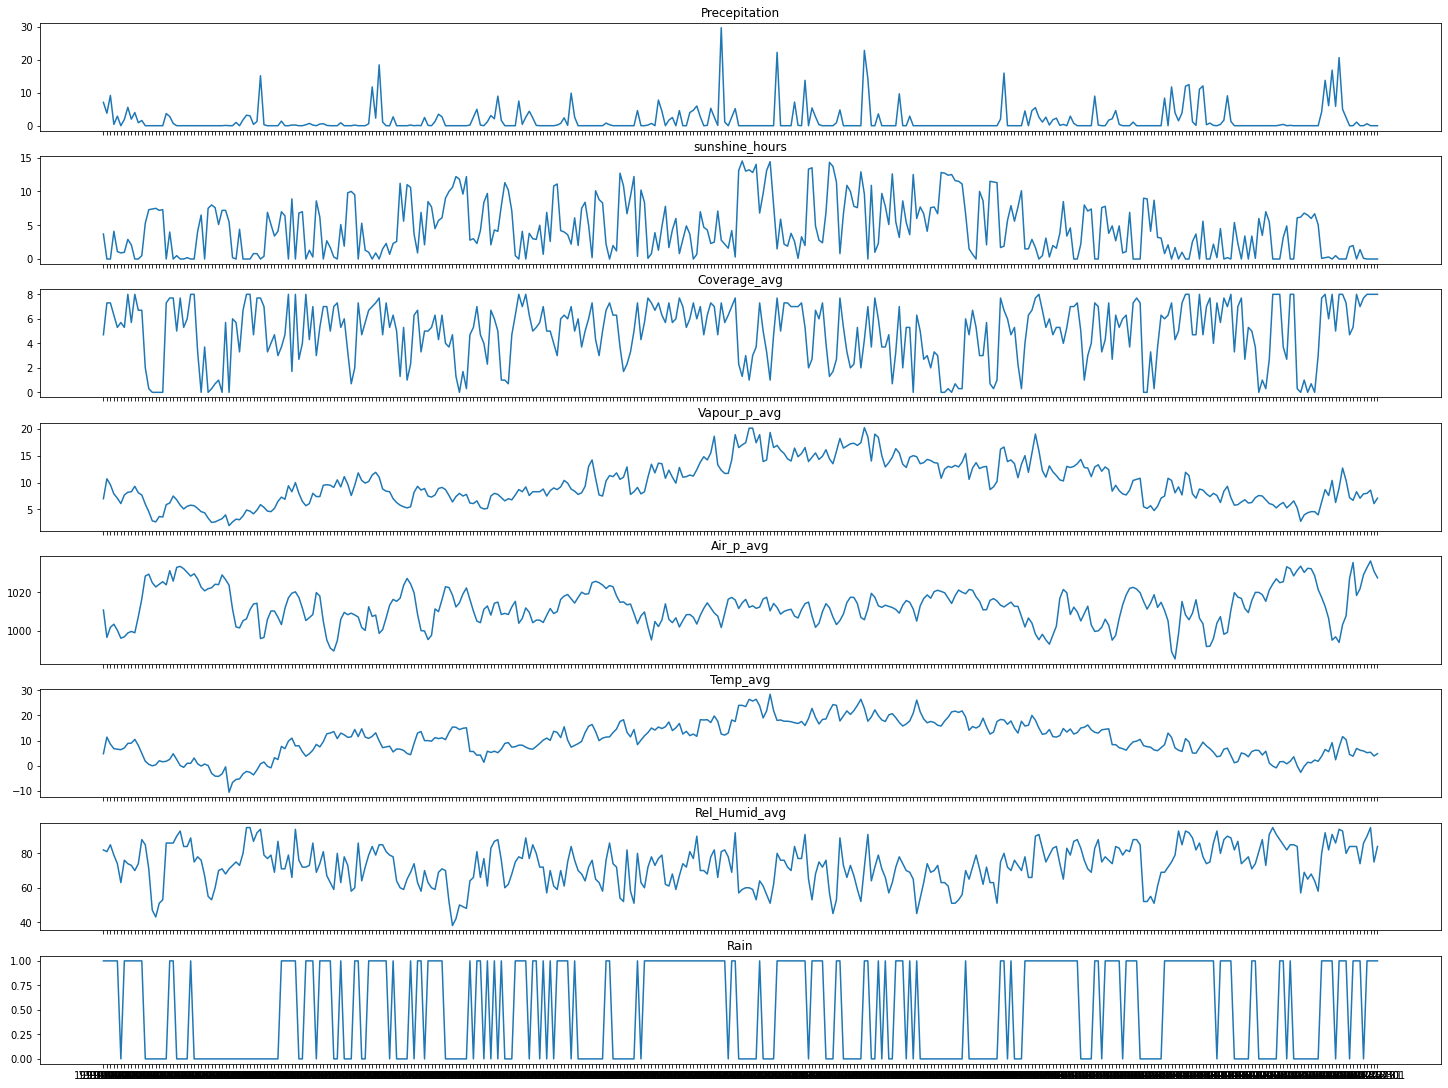

In [24]:
fig, axs = plt.subplots(8, figsize=(20,15), sharex=True, constrained_layout=True)
axs[0].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Precepitation'])
axs[1].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'sunshine_hours'])
axs[2].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Coverage_avg'])
axs[3].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Vapour_p_avg'])
axs[4].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Air_p_avg'])
axs[5].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Temp_avg'])
axs[6].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Rel_Humid_avg'])
axs[7].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Rain'])
axs[0].set_title('Precepitation')
axs[1].set_title('sunshine_hours')
axs[2].set_title('Coverage_avg')
axs[3].set_title('Vapour_p_avg')
axs[4].set_title('Air_p_avg')
axs[5].set_title('Temp_avg')
axs[6].set_title('Rel_Humid_avg')
axs[7].set_title('Rain')

plt.show()

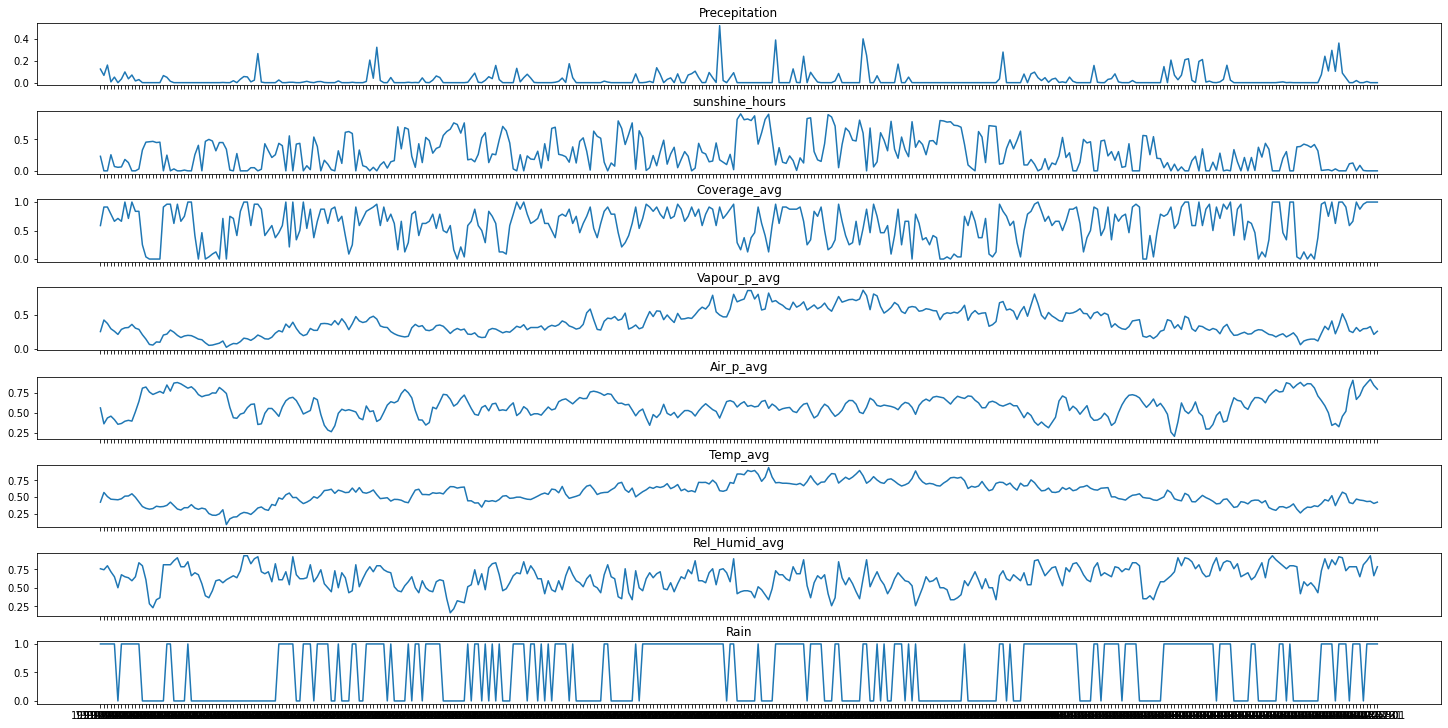

In [22]:
fig, axs = plt.subplots(8, figsize=(20,10), sharex=True, constrained_layout=True)
axs[0].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Precepitation'])
axs[1].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'sunshine_hours'])
axs[2].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Coverage_avg'])
axs[3].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Vapour_p_avg'])
axs[4].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Air_p_avg'])
axs[5].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Temp_avg'])
axs[6].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Rel_Humid_avg'])
axs[7].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Rain'])
axs[0].set_title('Precepitation')
axs[1].set_title('sunshine_hours')
axs[2].set_title('Coverage_avg')
axs[3].set_title('Vapour_p_avg')
axs[4].set_title('Air_p_avg')
axs[5].set_title('Temp_avg')
axs[6].set_title('Rel_Humid_avg')
axs[7].set_title('Rain')

plt.show()

In [26]:
mask = (df['Date']>'1991-01-01') & (df['Date'] <= '1991-12-31')
df.loc[mask, 'Wind_avg']

1       9.2
2       5.3
3       6.2
4       7.7
5      10.1
       ... 
360     5.6
361     1.5
362     2.3
363     0.4
364     2.7
Name: Wind_avg, Length: 364, dtype: float64

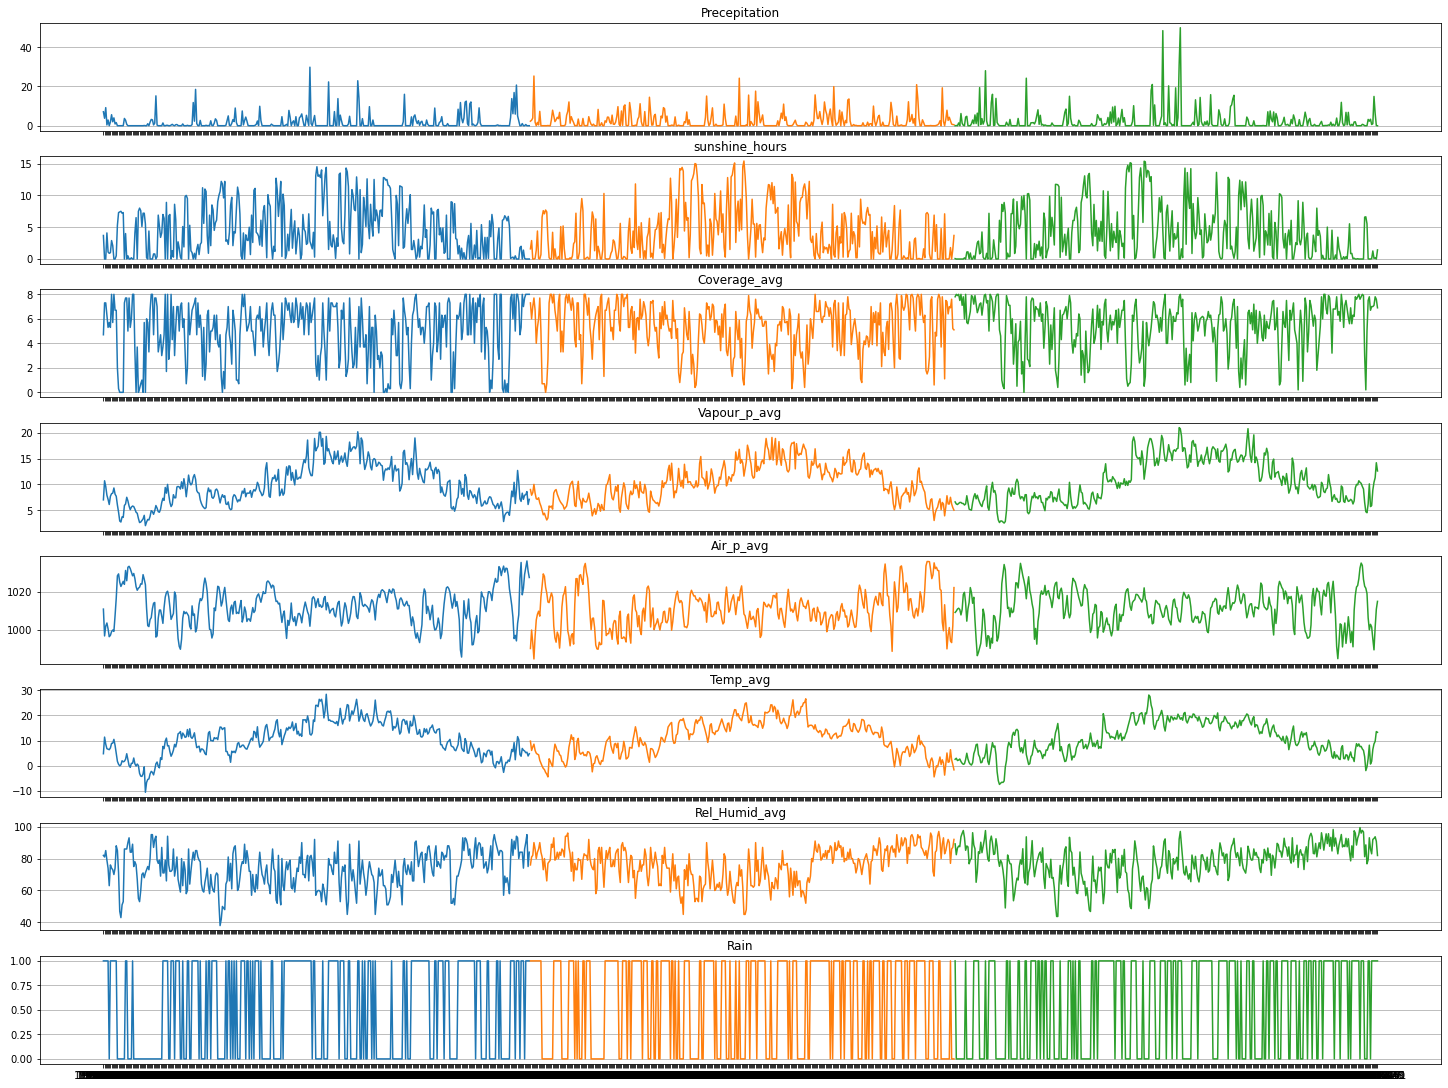

In [40]:
mask = (df['Date']>'2001-01-01') & (df['Date'] <= '2001-12-31')
mask2 = (df['Date']>'2021-01-01') & (df['Date'] <= '2021-12-31')
fig, axs = plt.subplots(8, figsize=(20,15), sharex=True, constrained_layout=True)
axs[0].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Precepitation'], label= '1991')
axs[1].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'sunshine_hours'])
axs[2].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Coverage_avg'])
axs[3].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Vapour_p_avg'])
axs[4].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Air_p_avg'])
axs[5].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Temp_avg'])
axs[6].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Rel_Humid_avg'])
axs[7].plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Rain'])
axs[0].plot(df.loc[mask, 'Date'],df.loc[mask, 'Precepitation'], label = '2001')
axs[1].plot(df.loc[mask, 'Date'],df.loc[mask, 'sunshine_hours'])
axs[2].plot(df.loc[mask, 'Date'],df.loc[mask, 'Coverage_avg'])
axs[3].plot(df.loc[mask, 'Date'],df.loc[mask, 'Vapour_p_avg'])
axs[4].plot(df.loc[mask, 'Date'],df.loc[mask, 'Air_p_avg'])
axs[5].plot(df.loc[mask, 'Date'],df.loc[mask, 'Temp_avg'])
axs[6].plot(df.loc[mask, 'Date'],df.loc[mask, 'Rel_Humid_avg'])
axs[7].plot(df.loc[mask, 'Date'],df.loc[mask, 'Rain'])
axs[0].plot(df.loc[mask2, 'Date'],df.loc[mask2, 'Precepitation'], label = '2021')
axs[1].plot(df.loc[mask2, 'Date'],df.loc[mask2, 'sunshine_hours'])
axs[2].plot(df.loc[mask2, 'Date'],df.loc[mask2, 'Coverage_avg'])
axs[3].plot(df.loc[mask2, 'Date'],df.loc[mask2, 'Vapour_p_avg'])
axs[4].plot(df.loc[mask2, 'Date'],df.loc[mask2, 'Air_p_avg'])
axs[5].plot(df.loc[mask2, 'Date'],df.loc[mask2, 'Temp_avg'])
axs[6].plot(df.loc[mask2, 'Date'],df.loc[mask2, 'Rel_Humid_avg'])
axs[7].plot(df.loc[mask2, 'Date'],df.loc[mask2, 'Rain'])
axs[0].set_title('Precepitation')
axs[1].set_title('sunshine_hours')
axs[2].set_title('Coverage_avg')
axs[3].set_title('Vapour_p_avg')
axs[4].set_title('Air_p_avg')
axs[5].set_title('Temp_avg')
axs[6].set_title('Rel_Humid_avg')
axs[7].set_title('Rain')
axs[0].grid(axis = 'y')
axs[1].grid(axis = 'y')
axs[2].grid(axis = 'y')
axs[3].grid(axis = 'y')
axs[4].grid(axis = 'y')
axs[5].grid(axis = 'y')
axs[6].grid(axis = 'y')
axs[7].grid(axis = 'y')
plt.show()

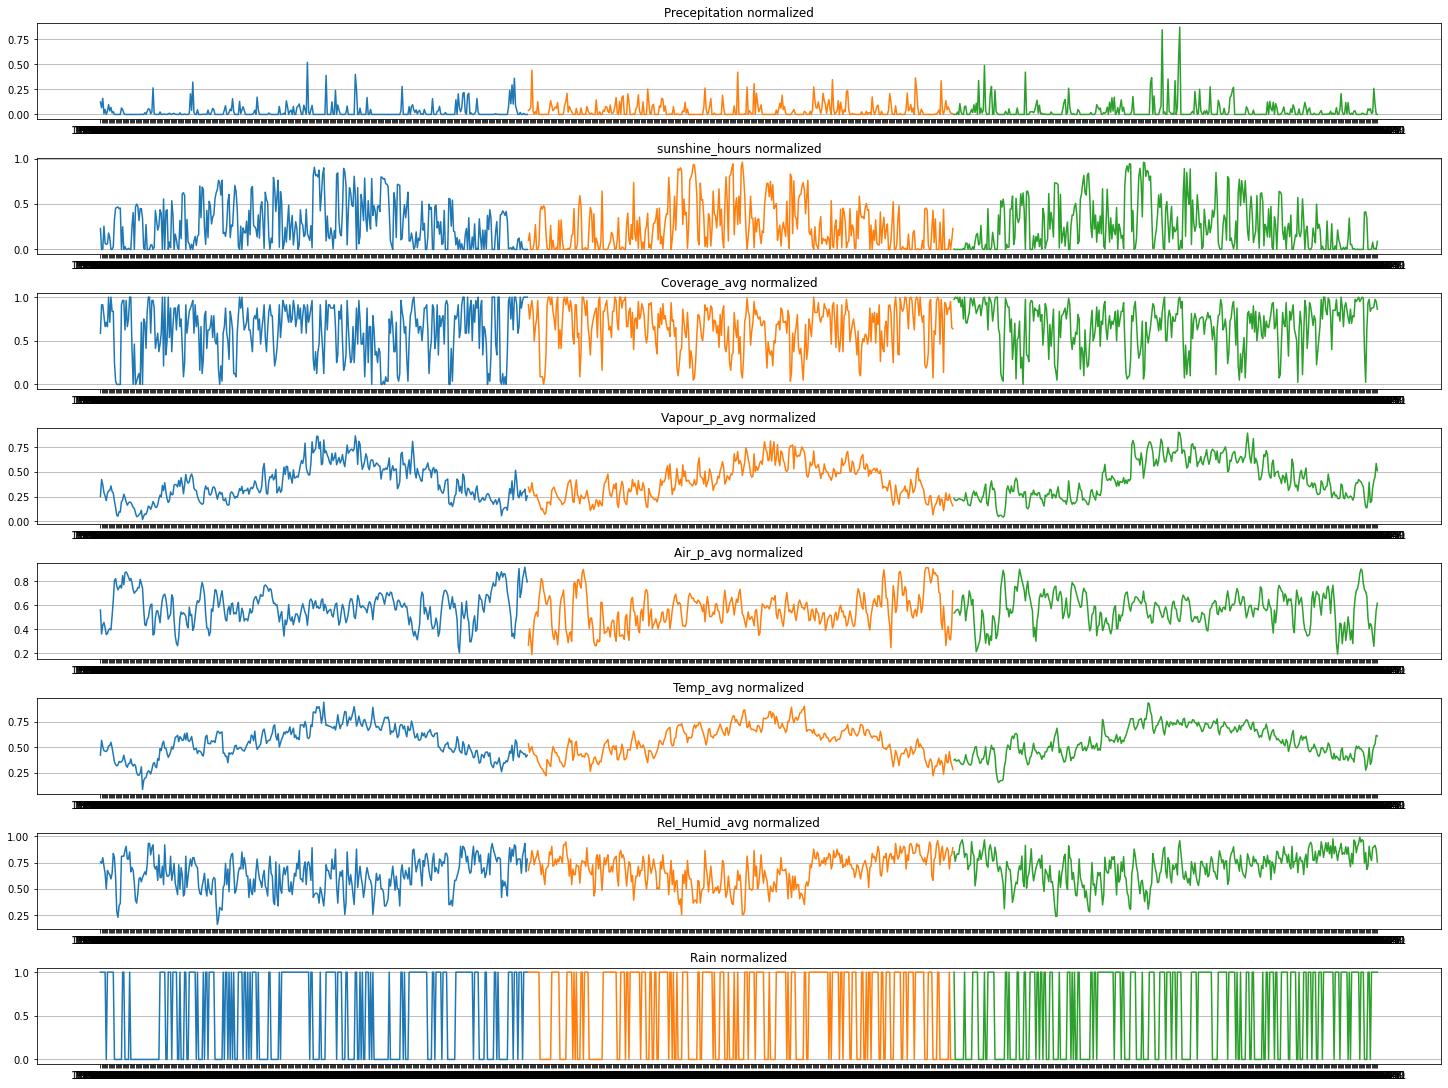

In [51]:
fig, axs = plt.subplots(8, figsize=(20,15), constrained_layout=True)
axs[2].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Coverage_avg'])
axs[0].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Precepitation'], label= '1991')
axs[3].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Vapour_p_avg'])
axs[4].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Air_p_avg'])
axs[5].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Temp_avg'])
axs[6].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Rel_Humid_avg'])
axs[1].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'sunshine_hours'])
axs[7].plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Rain'])
axs[0].plot(df_norm.loc[mask, 'Date'],df_norm.loc[mask, 'Precepitation'], label = '2001')
axs[1].plot(df_norm.loc[mask, 'Date'],df_norm.loc[mask, 'sunshine_hours'])
axs[2].plot(df_norm.loc[mask, 'Date'],df_norm.loc[mask, 'Coverage_avg'])
axs[3].plot(df_norm.loc[mask, 'Date'],df_norm.loc[mask, 'Vapour_p_avg'])
axs[4].plot(df_norm.loc[mask, 'Date'],df_norm.loc[mask, 'Air_p_avg'])
axs[5].plot(df_norm.loc[mask, 'Date'],df_norm.loc[mask, 'Temp_avg'])
axs[6].plot(df_norm.loc[mask, 'Date'],df_norm.loc[mask, 'Rel_Humid_avg'])
axs[7].plot(df_norm.loc[mask, 'Date'],df_norm.loc[mask, 'Rain'])
axs[0].plot(df_norm.loc[mask2, 'Date'],df_norm.loc[mask2, 'Precepitation'], label = '2021')
axs[1].plot(df_norm.loc[mask2, 'Date'],df_norm.loc[mask2, 'sunshine_hours'])
axs[2].plot(df_norm.loc[mask2, 'Date'],df_norm.loc[mask2, 'Coverage_avg'])
axs[3].plot(df_norm.loc[mask2, 'Date'],df_norm.loc[mask2, 'Vapour_p_avg'])
axs[4].plot(df_norm.loc[mask2, 'Date'],df_norm.loc[mask2, 'Air_p_avg'])
axs[5].plot(df_norm.loc[mask2, 'Date'],df_norm.loc[mask2, 'Temp_avg'])
axs[6].plot(df_norm.loc[mask2, 'Date'],df_norm.loc[mask2, 'Rel_Humid_avg'])
axs[7].plot(df_norm.loc[mask2, 'Date'],df_norm.loc[mask2, 'Rain'])
axs[0].set_title('Precepitation normalized')
axs[1].set_title('sunshine_hours normalized')
axs[2].set_title('Coverage_avg normalized')
axs[3].set_title('Vapour_p_avg normalized')
axs[4].set_title('Air_p_avg normalized')
axs[5].set_title('Temp_avg normalized')
axs[6].set_title('Rel_Humid_avg normalized')
axs[7].set_title('Rain normalized')
axs[0].grid(axis = 'y')
axs[1].grid(axis = 'y')
axs[2].grid(axis = 'y')
axs[3].grid(axis = 'y')
axs[4].grid(axis = 'y')
axs[5].grid(axis = 'y')
axs[6].grid(axis = 'y')
axs[7].grid(axis = 'y')
plt.show()

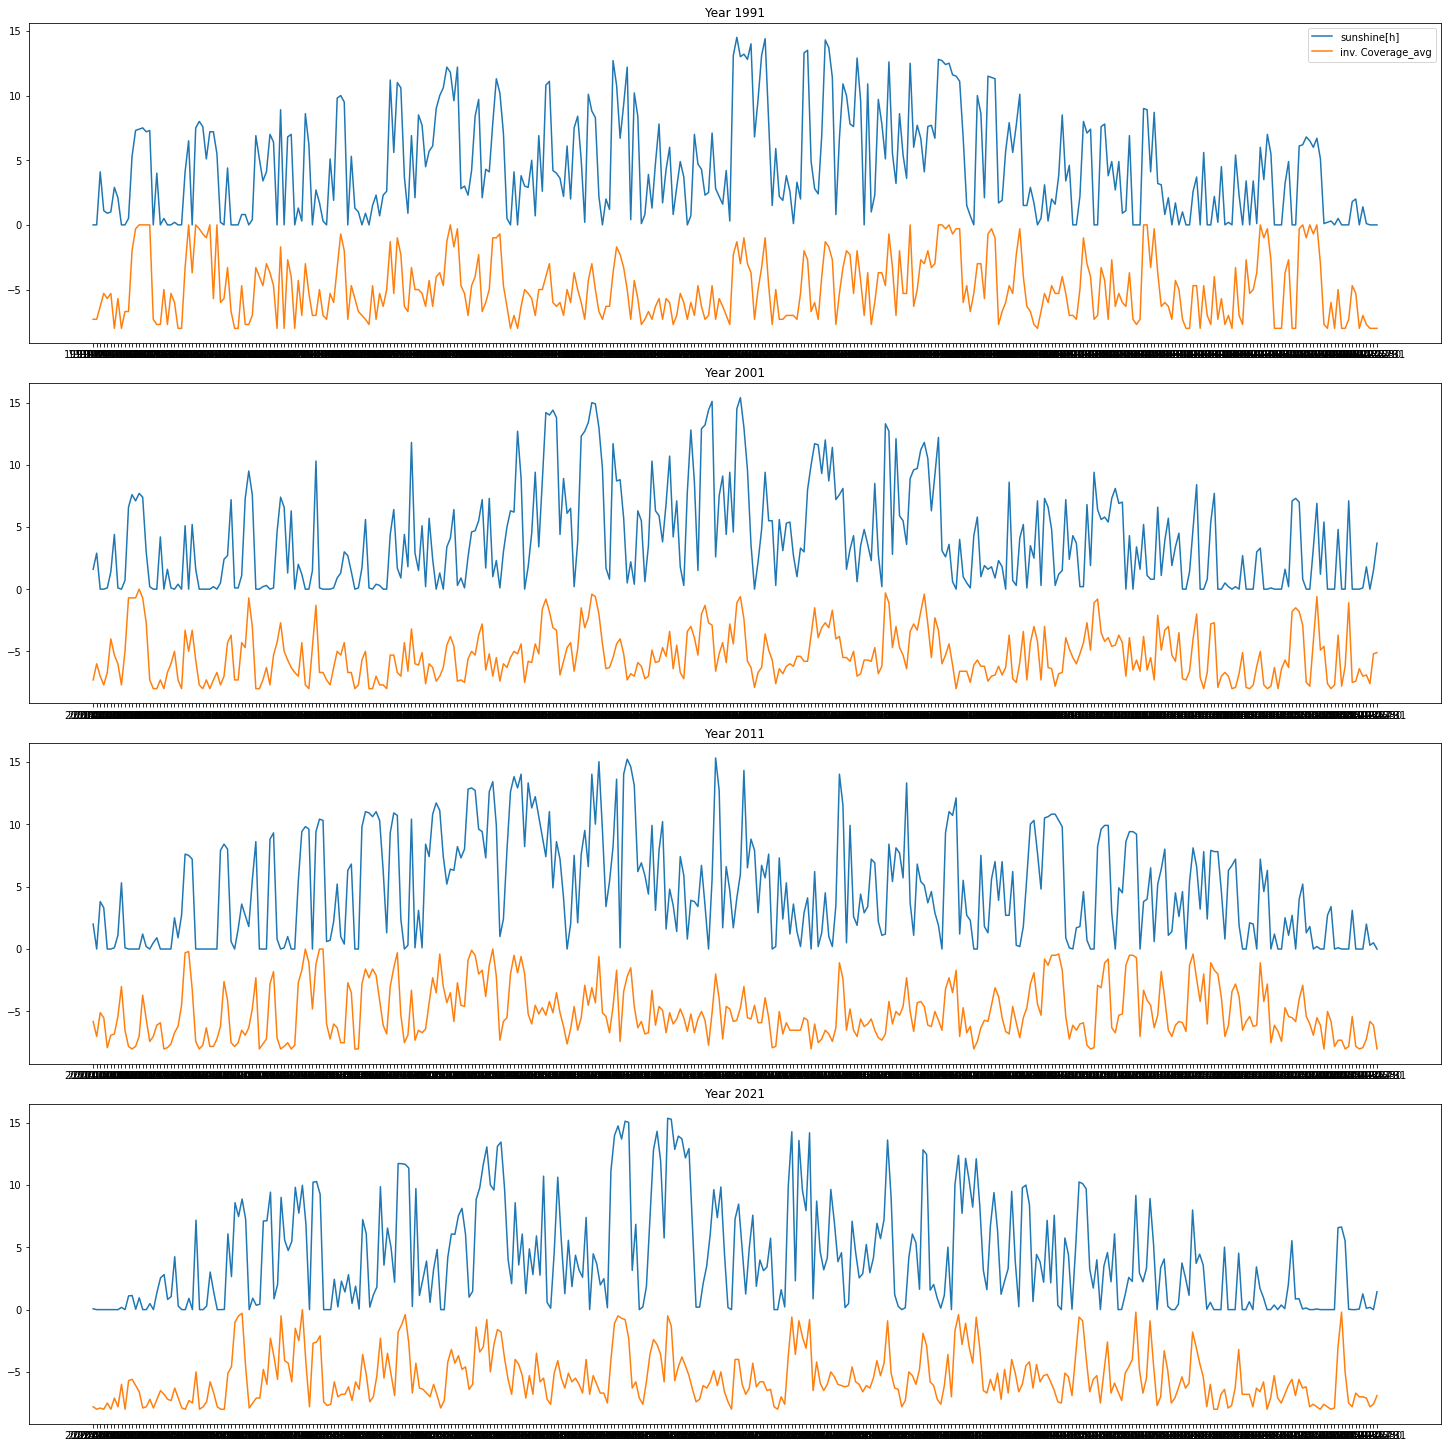

In [50]:
mask91 = (df['Date']>'1991-01-01') & (df['Date'] <= '1991-12-31')
mask01 = (df['Date']>'2001-01-01') & (df['Date'] <= '2001-12-31')
mask11 = (df['Date']>'2011-01-01') & (df['Date'] <= '2011-12-31')
mask21 = (df['Date']>'2021-01-01') & (df['Date'] <= '2021-12-31')
fig, axs = plt.subplots(4, figsize=(20,20), constrained_layout=True)
axs[0].plot (df.loc[mask91, 'Date'],df.loc[mask91, 'sunshine_hours'], label = 'sunshine[h]')
axs[0].plot( df.loc[mask91, 'Date'],-df.loc[mask91, 'Coverage_avg'], label = 'inv. Coverage_avg')
axs[1].plot (df.loc[mask01, 'Date'],df.loc[mask01, 'sunshine_hours'], label = 'sunshine[h]')
axs[1].plot( df.loc[mask01, 'Date'],-df.loc[mask01, 'Coverage_avg'], label = 'inv. Coverage_avg')
axs[2].plot (df.loc[mask11, 'Date'],df.loc[mask11, 'sunshine_hours'], label = 'sunshine[h]')
axs[2].plot( df.loc[mask11, 'Date'],-df.loc[mask11, 'Coverage_avg'], label = 'inv. Coverage_avg')
axs[3].plot (df.loc[mask21, 'Date'],df.loc[mask21, 'sunshine_hours'], label = 'sunshine[h]')
axs[3].plot( df.loc[mask21, 'Date'],-df.loc[mask21, 'Coverage_avg'], label = 'inv. Coverage_avg')

axs[0].set_title('Year 1991')
axs[1].set_title('Year 2001')
axs[2].set_title('Year 2011')
axs[3].set_title('Year 2021')
axs[0].legend()
plt.show()

# Conclusion:
* the hours of sunshine is inversely related to the coverage and to the time of year, which seems plausible, given the change of the sun's declination
* Vapour pressure and temperature obviously have a correlation, however, the content of the vapour pressure seems to increase of the years.